In [1]:
#import required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#drop least related columns
df.drop(['Name','PassengerId','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [4]:
#check null
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [5]:
#fill null
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of      Survived  Pclass     Sex        Age  SibSp  Parch Embarked
0           0       3    male  22.000000      1      0        S
1           1       1  female  38.000000      1      0        C
2           1       3  female  26.000000      0      0        S
3           1       1  female  35.000000      1      0        S
4           0       3    male  35.000000      0      0        S
..        ...     ...     ...        ...    ...    ...      ...
886         0       2    male  27.000000      0      0        S
887         1       1  female  19.000000      0      0        S
888         0       3  female  29.699118      1      2        S
889         1       1    male  26.000000      0      0        C
890         0       3    male  32.000000      0      0        Q

[889 rows x 7 columns]>

In [7]:
#encode categorical values
mapping_dict = {'Embarked':{'S':0,'C':1,'Q':2},'Sex':{'male':0,'female':1}}
df.replace(mapping_dict,inplace=True)

In [8]:
#reorder columns
df=df[['Pclass','Sex','Age','SibSp','Embarked','Parch','Survived']]
df.describe()

,Pclass,Sex,Age,SibSp,Embarked,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,0.350956,29.653446,0.524184,0.362205,0.382452,0.382452
std,0.834700,0.477538,12.968366,1.103705,0.636157,0.806761,0.486260
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,2.000000,6.000000,1.000000


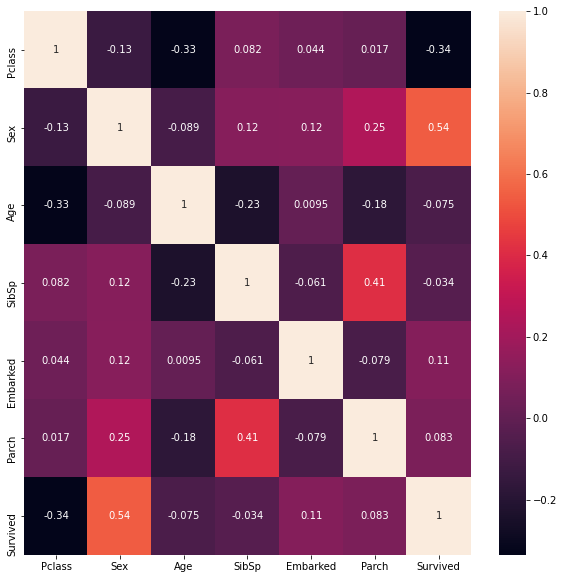

In [9]:
#check correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color='k',annot=True)

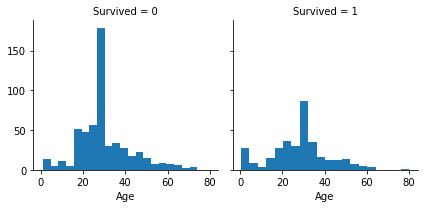

In [10]:
#check relation of variables with survival
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

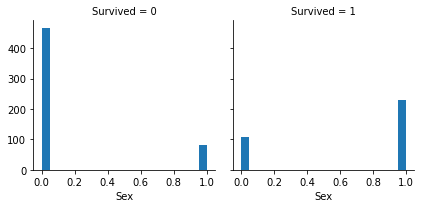

In [11]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

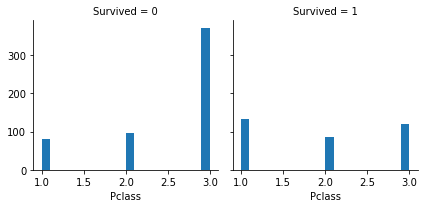

In [12]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

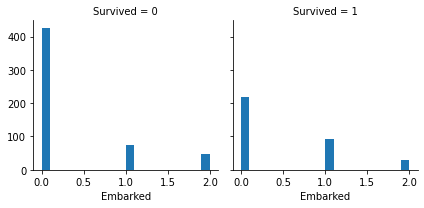

In [13]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Embarked', bins=20)

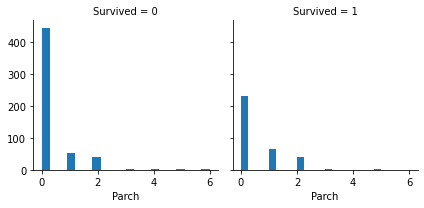

In [14]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Parch', bins=20)

In [15]:
#drop column as this represents number of siblings/spouse
ds=df.drop('SibSp',axis=1)

Pclass         AxesSubplot(0.125,0.536818;0.227941x0.343182)
Sex         AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Age         AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Embarked          AxesSubplot(0.125,0.125;0.227941x0.343182)
Parch          AxesSubplot(0.398529,0.125;0.227941x0.343182)
Survived       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

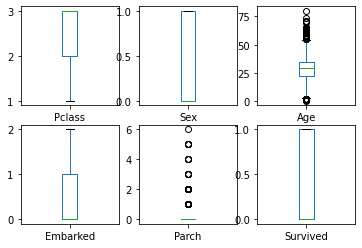

In [16]:
#boxplot of each variable to check range
ds.plot(kind='box',subplots=True,layout = (2,3))

In [17]:
#remove outliers
from scipy.stats import zscore
z=np.abs(zscore(ds))
z
ds_f = ds[(z<3).all(axis=1)]

In [18]:
#using logistic as target has only 2 values
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [19]:
#divide data
x=ds_f.iloc[:,0:-1]
x.shape
y=ds_f.iloc[:,-1]
y.head

<bound method NDFrame.head of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 867, dtype: int64>

In [20]:
print(x.shape)
print(y.shape)

(867, 5)
(867,)


In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [27]:
#train and predict
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print(accuracy_score(y_test,pred))

0.7643979057591623


In [28]:
print(x.shape)
print(y.shape)

()
(867,)


In [30]:
#divide data
x1=ds_f.iloc[:,0:-1]
x1.shape
y1=ds_f.iloc[:,-1]
y1.shape

(867,)

In [31]:
x1.shape

(867, 5)

In [34]:
max_acc = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    lg.fit(x1_train,y1_train)
    pred = lg.predict(x1_test)
    x=accuracy_score(y1_test,pred)
    if x>max_acc:
        max_acc = x
        random_state=i

In [35]:
print(max_acc,
random_state)

0.8324607329842932 51


In [ ]:
#finalizing model at randomstate 51 as getting highest accuracy


In [42]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=51)
lg.fit(x1_train,y1_train)
y_pred = lg.predict(x1_test)
print(accuracy_score(y1_test,y_pred))

0.8324607329842932


In [43]:
from sklearn.metrics import mean_squared_error
print('RMSE is',np.sqrt(mean_squared_error(y1_test,y_pred)))

RMSE is 0.4093156080773207


In [46]:
import joblib

In [47]:
joblib.dump(lg,'titanic_logistic.pkl')

['titanic_logistic.pkl']